In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.core import datetools
import pandas_datareader as pdr
import datetime 
import fix_yahoo_finance as yf
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [25]:
start=datetime.datetime(2008, 1, 1)
end=datetime.datetime(2017, 12, 31)

goog = yf.download('GOOG', start,end)


[*********************100%***********************]  1 of 1 downloaded

In [27]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,458.113641,461.910874,453.936474,458.012074,458.012074,4.974262e+06
std,233.619327,234.770555,232.393890,233.731540,233.731540,4.382626e+06
min,130.406830,133.814667,122.850975,127.888214,127.888214,7.900000e+03
25%,270.659614,272.986969,266.895348,269.676018,269.676018,1.837300e+06
50%,368.808762,373.796311,366.305039,369.909104,369.909104,3.943500e+06
75%,600.001922,603.056442,594.365250,597.951660,597.951660,6.239100e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,4.687730e+07


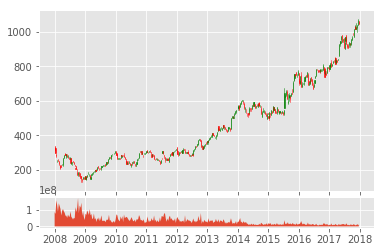

In [28]:
goog.to_csv('goog.csv')
df = pd.read_csv('goog.csv', header=0, index_col='Date', parse_dates=True)


ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

df_ohlc = df['Adj Close'].resample('10D').ohlc() # we could do sum, mean etd
# Note that some stocks may have splits. This requires careful treatment
df_volume = df['Volume'].resample('10D').sum()
#print(df_ohlc.head())

df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
#print (df_ohlc.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()


Epoch 1/15
2349/2349 [==============================] - 114s 49ms/step - loss: 0.0224
Epoch 2/15
2349/2349 [==============================] - 78s 33ms/step - loss: 0.0031
Epoch 3/15
2349/2349 [==============================] - 80s 34ms/step - loss: 0.0030
Epoch 4/15
2349/2349 [==============================] - 91s 39ms/step - loss: 0.0027
Epoch 5/15
2349/2349 [==============================] - 88s 38ms/step - loss: 0.0027
Epoch 6/15
2349/2349 [==============================] - 85s 36ms/step - loss: 0.0022
Epoch 7/15
2349/2349 [==============================] - 64s 27ms/step - loss: 0.0026
Epoch 8/15
2349/2349 [==============================] - 80s 34ms/step - loss: 0.0022
Epoch 9/15
2349/2349 [==============================] - 69s 30ms/step - loss: 0.0025
Epoch 10/15
2349/2349 [==============================] - 70s 30ms/step - loss: 0.0024
Epoch 11/15
2349/2349 [==============================] - 60s 25ms/step - loss: 0.0020
Epoch 12/15
2349/2349 [==============================] - 60s 2

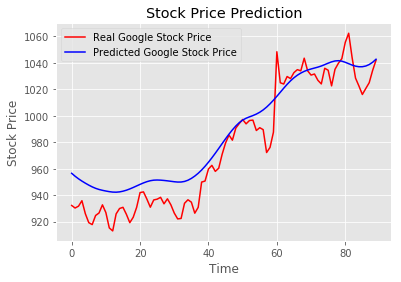

             precision    recall  f1-score   support

          0       0.64      0.79      0.71        52
          1       0.56      0.38      0.45        37

avg / total       0.61      0.62      0.60        89

[[41 11]
 [23 14]]


In [30]:

# Feature Scaling  #for ANN, it's advised to use normalization instead of standardization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


# Creating a data structure with 60 timesteps and 1 output

n_pt = 60
adv = 5 # this is next day prediction
tmp = len(goog) -ts - val - adv

X_train = []
y_train = []
for i in range(n_pt, tmp):
    X_train.append(training_set_scaled[i-n_pt:i, 0])
    y_train.append(training_set_scaled[i+adv, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Initialising the RNN
reg = Sequential()

reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

# Adding the output layer
reg.add(Dense(units = 1))



# Compiling the RNN
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
reg.fit(X_train, y_train, epochs = 15, batch_size = 32)



# Getting the real stock price 
real_stock_price = dataset_valid.iloc[:, 1:2].values


# Getting the predicted stock price of 2017
dataset_total = data['Open']
inputs = dataset_total[len(dataset_total) - len(dataset_valid) - n_pt - adv:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

#I = inputs.shape[0]
I = n_pt + val
X_valid = []
for i in range(n_pt, I):
    X_valid.append(inputs[i-n_pt:i, 0])
X_valid = np.array(X_valid)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
predicted_stock_price = reg.predict(X_valid)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




pred = []
real = []

for i in range(1,val):
    if real_stock_price[i]>real_stock_price[i-1]:
        real.append(0)
    else:
        real.append(1)


for i in range(1,val):
    if predicted_stock_price[i]>predicted_stock_price[i-1]:
        pred.append(0)
    else:
        pred.append(1)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(real, pred))

print(confusion_matrix(real, pred))

